In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import somoclu
import datetime
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from scipy.spatial.distance import cdist, cosine, euclidean, minkowski, mahalanobis 
from matplotlib import pyplot as plt
from matplotlib import ticker, style

style.use('ggplot')

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

In [2]:
labels = pd.read_pickle("tmp/labels-1m.pkl")
indicators = pd.read_pickle("tmp/indicators-1m.pkl")

In [3]:
indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983061 entries, 0 to 983060
Data columns (total 32 columns):
s.cena_vypoctena                                        983061 non-null float64
s.chyba_firma_vznikla_kratce_pred_podpisem_smlouvy      983061 non-null bool
s.chyba_necitelnost_smlouvy                             983061 non-null bool
s.chyba_nulova_hodnota_smlouvy                          983061 non-null bool
s.chyba_smlouva_uzavrena_s_nespolehlivym_platcem_dph    983061 non-null bool
s.clustering_coefficient_prijemce                       983061 non-null float64
s.pagerank_prijemce                                     983061 non-null float64
s.shoda_community_stran                                 983061 non-null bool
s.stupen_prijemce                                       983061 non-null float64
s.stupen_sidla_prijemce                                 983061 non-null float64
s.politici                                              983061 non-null bool
s.pomer_ceny_prumer_platce 

In [4]:
scaler = StandardScaler(copy=True)
normalized = scaler.fit_transform(indicators)

In [5]:
n_rows, n_columns = 20, 20
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
som.train(normalized)

In [14]:
# som.cluster(algorithm=KMeans(n_clusters=7, n_jobs=-1))
som.cluster(algorithm=AgglomerativeClustering(n_clusters=11))

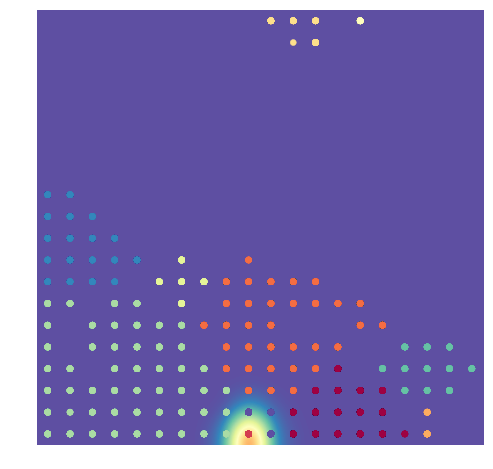

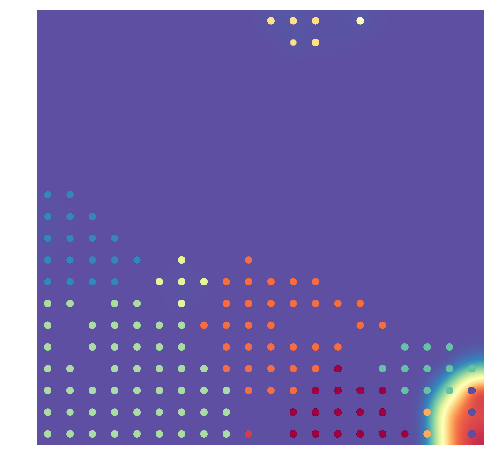

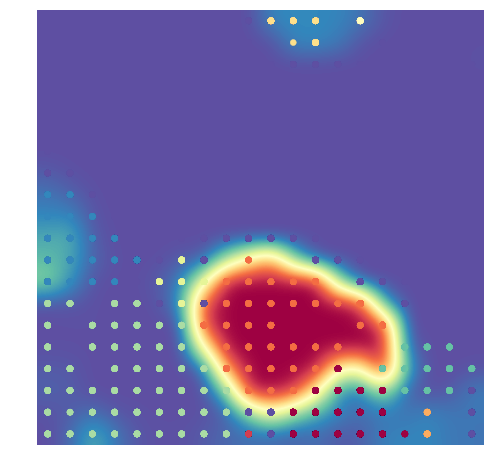

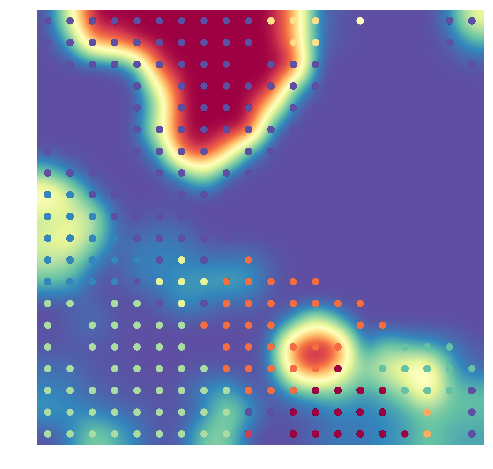

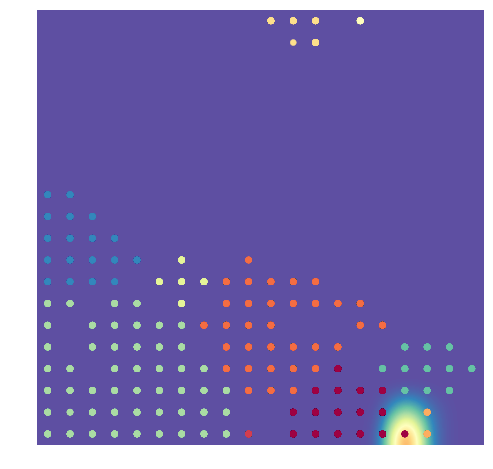

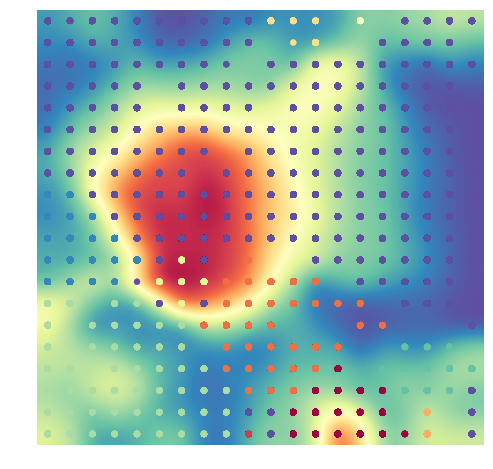

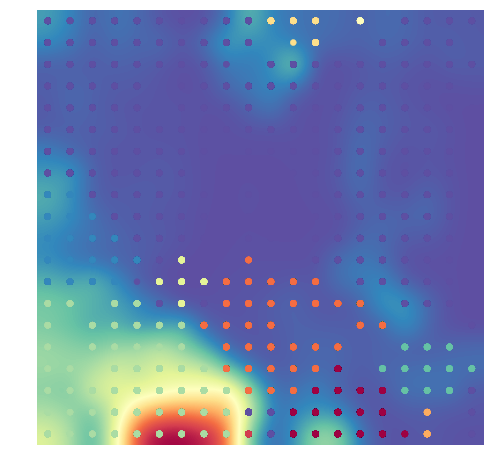

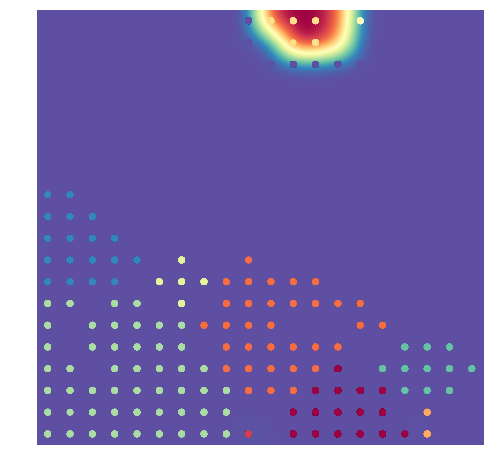

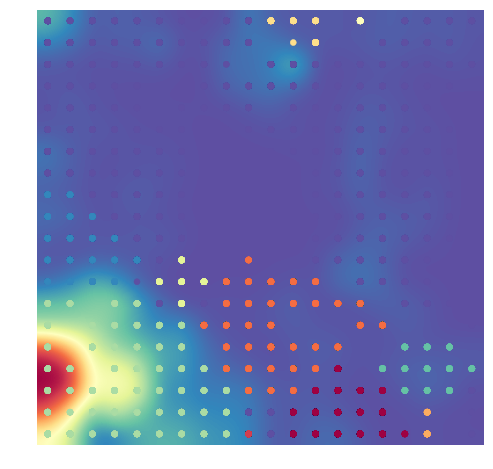

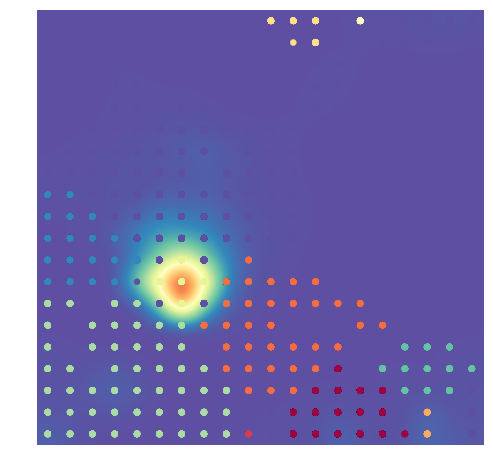

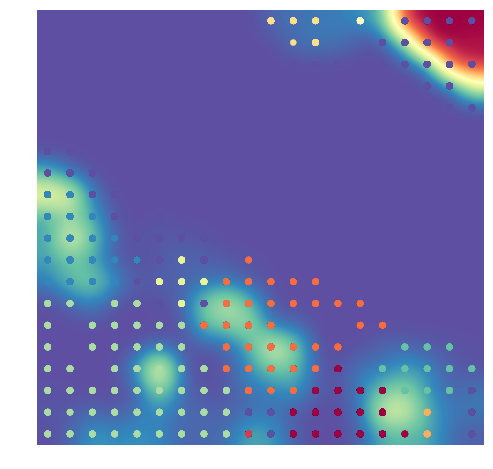

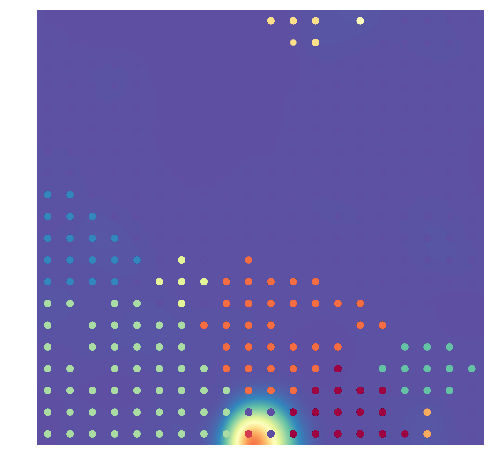

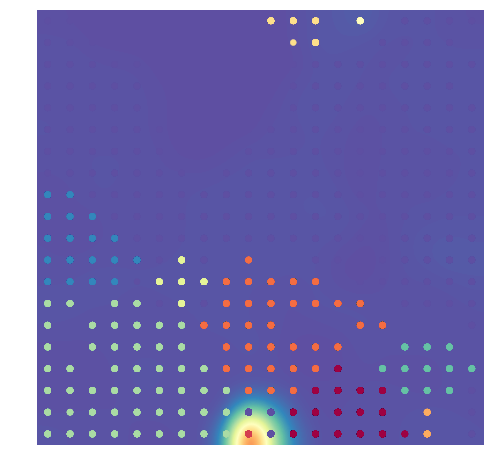

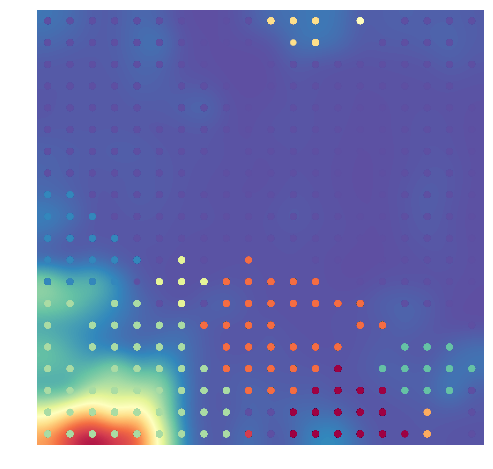

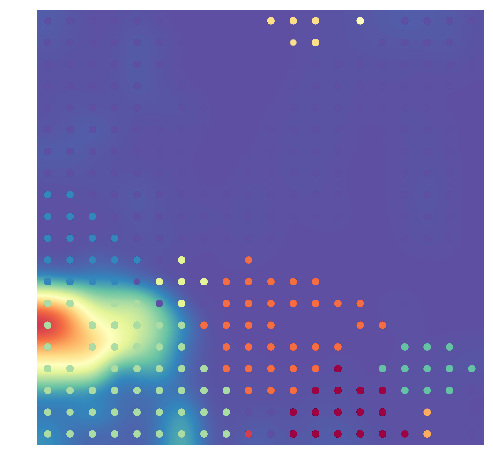

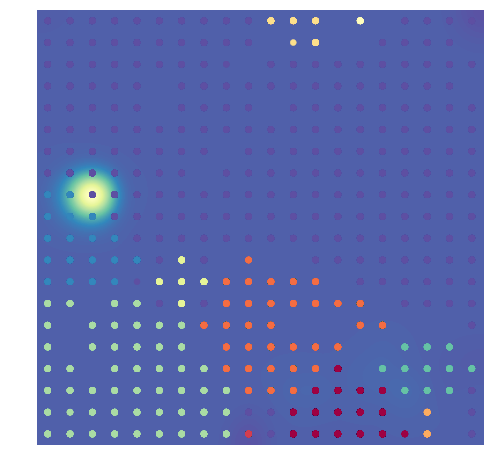

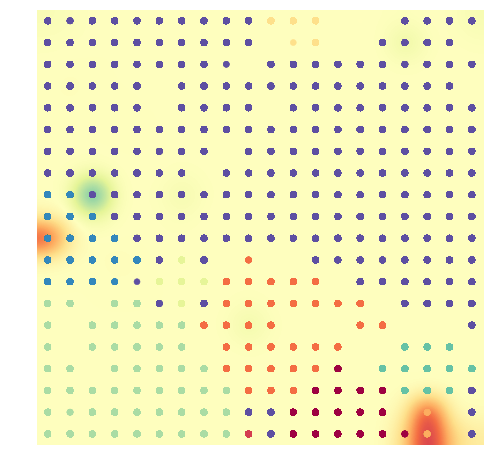

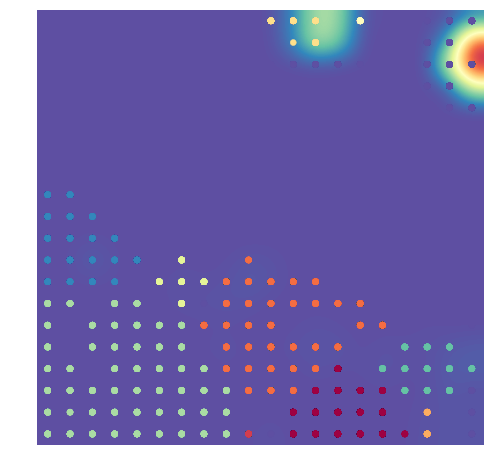

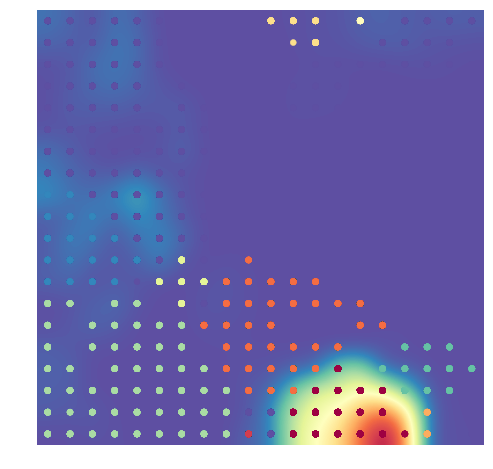

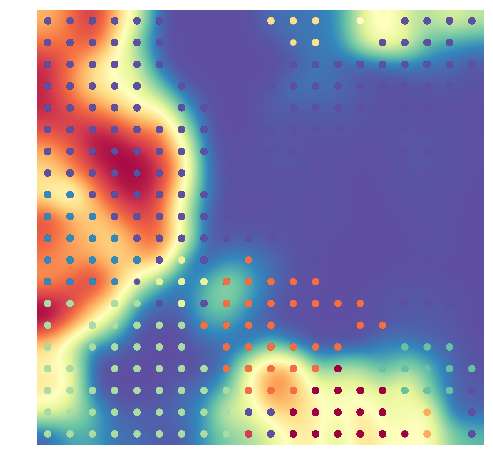

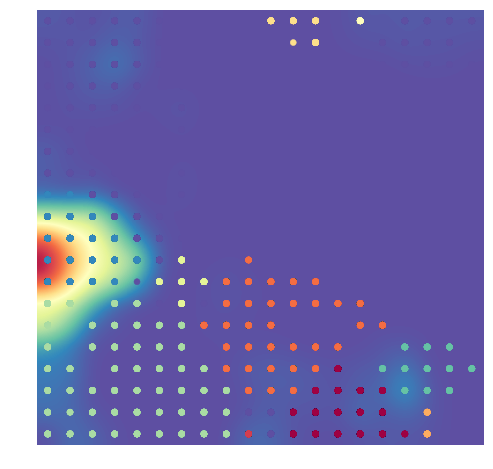

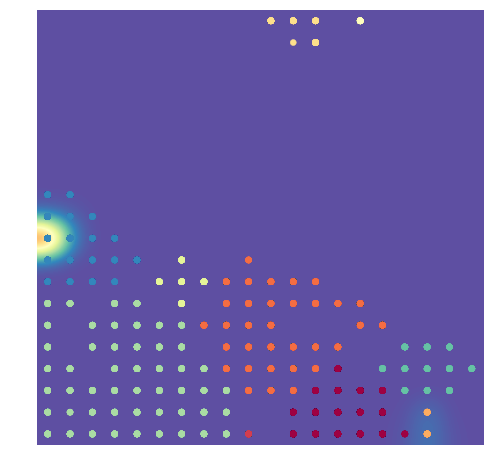

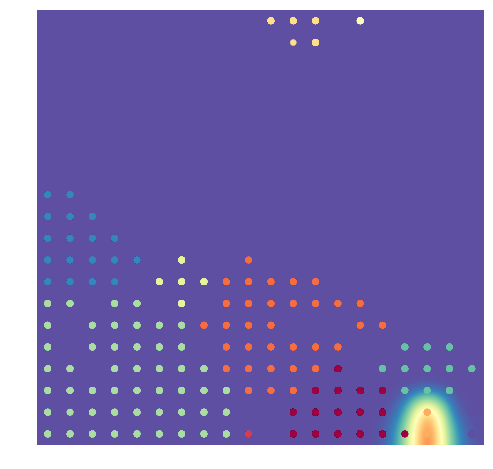

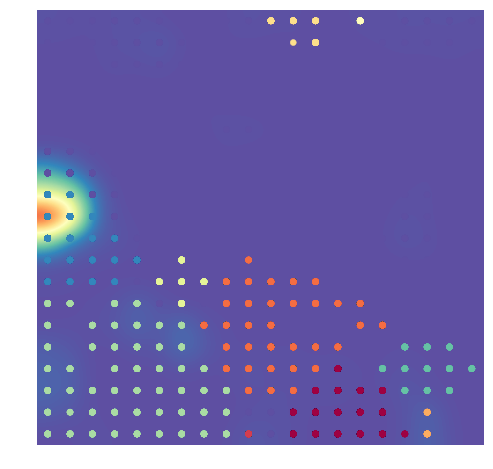

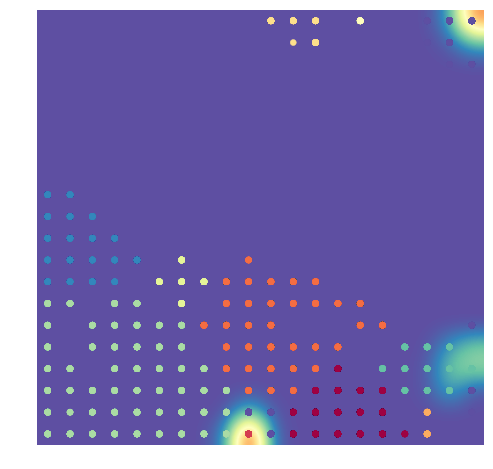

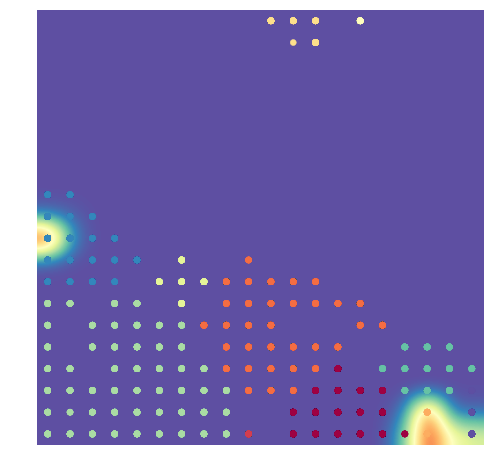

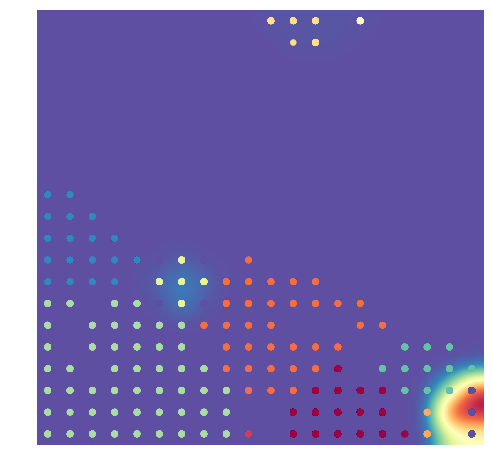

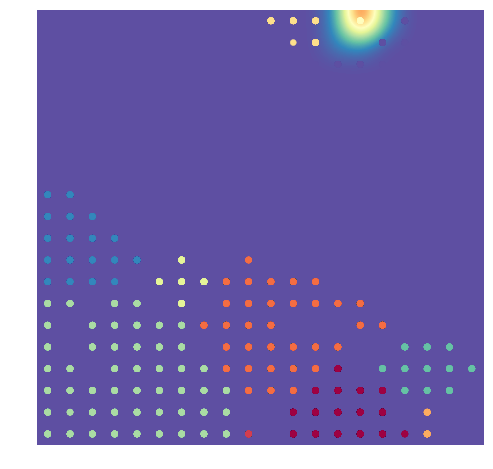

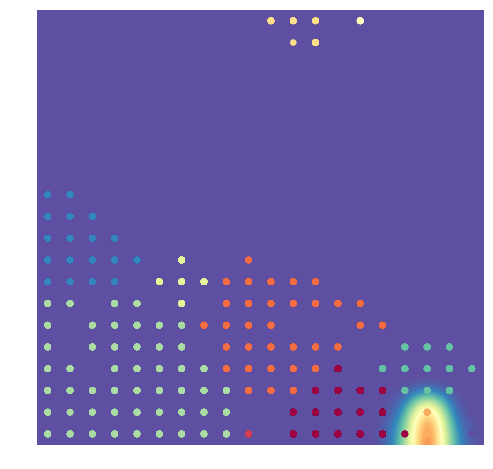

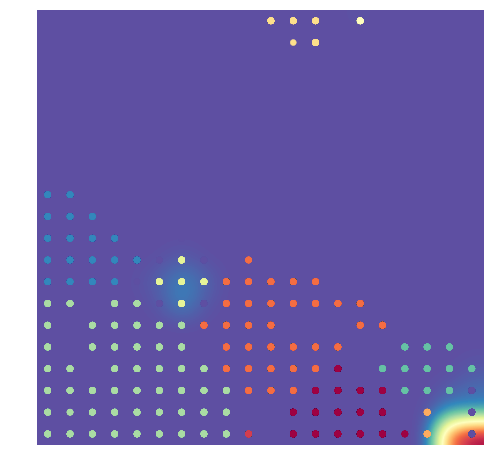

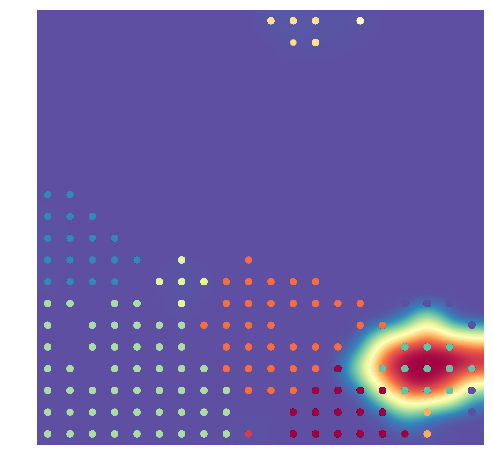

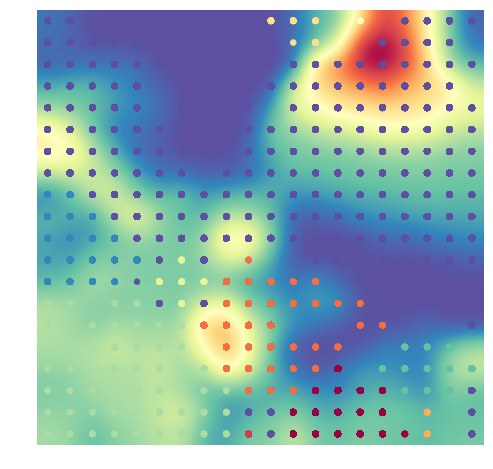

<module 'matplotlib.pyplot' from 'c:\\users\\jan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [16]:
som.view_component_planes(bestmatches=True)

<module 'matplotlib.pyplot' from 'c:\\users\\jan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

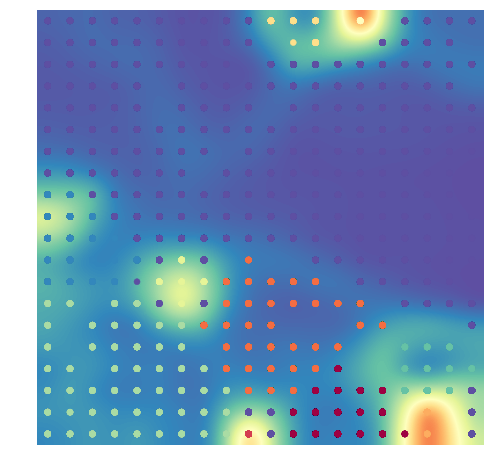

In [15]:
som.view_umatrix(bestmatches=True, filename="vystup/u-matice.png")

In [9]:
# som.view_umatrix(bestmatches=True, labels=labels, zoom=((10, 19), (10, 19)))

In [10]:
# som.view_activation_map(data_index=100000)

In [11]:
indicators.corr().round(2)

s.cena_vypoctena  \
s.cena_vypoctena                                                1.00   
s.chyba_firma_vznikla_kratce_pred_podpisem_smlouvy             -0.00   
s.chyba_necitelnost_smlouvy                                    -0.00   
s.chyba_nulova_hodnota_smlouvy                                 -0.01   
s.chyba_smlouva_uzavrena_s_nespolehlivym_platce...             -0.00   
s.clustering_coefficient_prijemce                              -0.01   
s.pagerank_prijemce                                             0.02   
s.shoda_community_stran                                        -0.00   
s.stupen_prijemce                                               0.01   
s.stupen_sidla_prijemce                                        -0.00   
s.politici                                                      0.01   
s.pomer_ceny_prumer_platce                                      0.19   
s.pomer_ceny_prumer_prijemce                                    0.09   
s.pomer_stejny_prijemce                                         0.01   
s.suma_pod_hranici_stejny_prijemce                              0.00   
s.pocet_uchazecu_zakazky                                       -0.00   
s.cena_smlouva_zakazka                                          0.00   
s.napojeni_na_spolecnika_prijemce                              -0.00   
s.pomer_spoluprace_prijemce                                     0.00   
s.pomer_uspesnosti_prijemce                                     0.00   
s.pomer_jrbu_prijemce                                           0.00   
s.zakazka_jrbu                                                  0.00   
s.insolvence_prijemce                                           0.00   
s.zakladni_kapital_prijemce                                     0.01   
pocet_uchazecu_zakazky_jeden                                    0.00   
cena_smlouva_zakazka_pres                                       0.00   
stari_prijemce_novy                                            -0.00   
cena_bez_dph_pod_2m                                            -0.00   
cena_bez_dph_pod_6m                                             0.00   
nizky_zakladni_kapital                                         -0.00   
vikend                                                         -0.00   
benford                                                         0.00   

                                                    s.chyba_firma_vznikla_kratce_pred_podpisem_smlouvy  \
s.cena_vypoctena                                                                                -0.00    
s.chyba_firma_vznikla_kratce_pred_podpisem_smlouvy                                               1.00    
s.chyba_necitelnost_smlouvy                                                                      0.00    
s.chyba_nulova_hodnota_smlouvy                                                                   0.02    
s.chyba_smlouva_uzavrena_s_nespolehlivym_platce...                                              -0.00    
s.clustering_coefficient_prijemce                                                               -0.02    
s.pagerank_prijemce                                                                             -0.01    
s.shoda_community_stran                                                                          0.01    
s.stupen_prijemce                                                                               -0.01    
s.stupen_sidla_prijemce                                                                          0.00    
s.politici                                                                                      -0.00    
s.pomer_ceny_prumer_platce                                                                      -0.00    
s.pomer_ceny_prumer_prijemce                                                                     0.00    
s.pomer_stejny_prijemce                                                                         -0.01    
s.suma_pod_hranici_stejny_prijemce                                                   